<a href="https://colab.research.google.com/github/vishusakhare/project/blob/main/email_classification_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
email=pd.read_csv('/content/drive/MyDrive/mashine learning/spam_assassin (1).csv')

In [ ]:
email

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0
...,...,...
5791,From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...,0
5792,From fork-admin@xent.com Mon Oct 7 20:37:02 20...,0
5793,Received: from hq.pro-ns.net (localhost [127.0...,1
5794,From razor-users-admin@lists.sourceforge.net T...,0


In [ ]:
email.head()

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [ ]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5796 non-null   object
 1   target  5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB


In [ ]:
email.describe()

,target
count,5796.000000
mean,0.327122
std,0.469203
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
email.duplicated().sum()

467

In [ ]:
email.isnull().sum()

,0
text,0
target,0


In [ ]:
email=email.drop_duplicates()

In [ ]:
email.duplicated().sum()

0

In [ ]:
email.shape

(5329, 2)

EDA (Explotrary Data Analysis)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
email['target'].value_counts()

,count
target,
0,3638
1,1691


[]

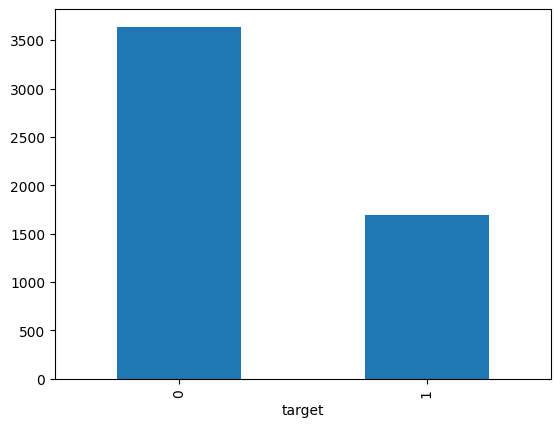

In [ ]:
email['target'].value_counts().plot(kind='bar') .plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7cb3e0248f10>,
 [Text(-0.5972071562425567, 0.9237659944664984, 'ham'),
  Text(0.5972070697533401, -0.9237660503810634, 'spam')],
 [Text(-0.3257493579504855, 0.5038723606180899, '68.27'),
  Text(0.3257493107745491, -0.5038723911169436, '31.73')])

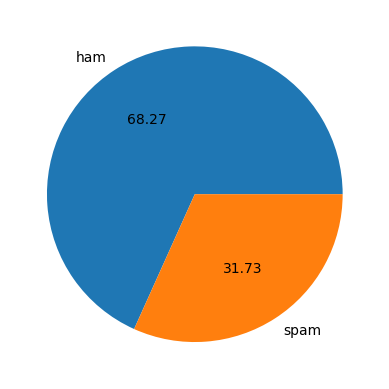

In [ ]:
plt.pie(x=email['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [ ]:
import nltk
!pip install nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Assuming 'email' is your DataFrame and 'text' is the column you want to work with
email['text_length'] = email['text'].apply(len)

<ipython-input-30-374074fa7ae3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email['text_length'] = email['text'].apply(len)


In [ ]:
email['text']=email['text'].apply(lambda x:x.lower())

<ipython-input-31-15d39ba5babc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email['text']=email['text'].apply(lambda x:x.lower())


In [ ]:
email.head()

,text,target,text_length
0,from ilug-admin@linux.ie mon jul 29 11:28:02 2...,0,4098
1,from gort44@excite.com mon jun 24 17:54:21 200...,1,2189
2,from fork-admin@xent.com mon jul 29 11:39:57 2...,1,3598
3,from dcm123@btamail.net.cn mon jun 24 17:49:23...,1,1918
4,from ilug-admin@linux.ie mon aug 19 11:02:47 2...,0,3060


In [ ]:
email['text']

,text
0,from ilug-admin@linux.ie mon jul 29 11:28:02 2...
1,from gort44@excite.com mon jun 24 17:54:21 200...
2,from fork-admin@xent.com mon jul 29 11:39:57 2...
3,from dcm123@btamail.net.cn mon jun 24 17:49:23...
4,from ilug-admin@linux.ie mon aug 19 11:02:47 2...
...,...
5791,from ilug-admin@linux.ie mon jul 22 18:12:45 2...
5792,from fork-admin@xent.com mon oct 7 20:37:02 20...
5793,received: from hq.pro-ns.net (localhost [127.0...
5794,from razor-users-admin@lists.sourceforge.net t...


In [ ]:
email['num_words']=email['text'].apply(len)  #calculates the total number of characters in the string.

<ipython-input-34-012eac9a570c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email['num_words']=email['text'].apply(len)  #calculates the total number of characters in the string.


In [ ]:
email['num_characters']=email['text'].apply(len)

<ipython-input-35-e6d6644cdf9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email['num_characters']=email['text'].apply(len)


In [ ]:
email['num_words']=email['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#actual number of words in the text, not characters.

<ipython-input-36-d29132dca2a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email['num_words']=email['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
email['num_sentences']=email['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-37-599738d51ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email['num_sentences']=email['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
email.head()

,text,target,text_length,num_words,num_characters,num_sentences
0,from ilug-admin@linux.ie mon jul 29 11:28:02 2...,0,4098,816,4098,13
1,from gort44@excite.com mon jun 24 17:54:21 200...,1,2189,520,2189,13
2,from fork-admin@xent.com mon jul 29 11:39:57 2...,1,3598,640,3598,11
3,from dcm123@btamail.net.cn mon jun 24 17:49:23...,1,1918,451,1918,1
4,from ilug-admin@linux.ie mon aug 19 11:02:47 2...,0,3060,620,3060,7


In [ ]:
email[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5329.000000,5329.000000,5329.000000
mean,4164.186527,799.453181,12.183899
std,6030.253952,907.913326,22.842430
min,362.000000,68.000000,1.000000
25%,2390.000000,447.000000,5.000000
50%,3296.000000,602.000000,8.000000
75%,4492.000000,839.000000,13.000000
max,232305.000000,18622.000000,809.000000


In [ ]:
#ham
email[email['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3638.000000,3638.000000,3638.000000
mean,3461.003573,634.795492,11.242166
std,3173.399352,590.459097,22.069949
min,362.000000,68.000000,1.000000
25%,2400.250000,451.000000,5.000000
50%,3183.500000,581.000000,8.000000
75%,4054.250000,734.000000,13.000000
max,92469.000000,17677.000000,809.000000


In [ ]:
#spam
email[email['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1691.000000,1691.000000,1691.000000
mean,5677.007096,1153.696038,14.209935
std,9466.602237,1290.167784,24.304996
min,736.000000,134.000000,1.000000
25%,2364.000000,429.000000,4.000000
50%,3809.000000,762.000000,8.000000
75%,6211.500000,1444.000000,15.000000
max,232305.000000,18622.000000,408.000000


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-42-4f38520b835d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email['text_length'] = email['text'].apply(len)
<ipython-input-42-4f38520b835d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email['text']=email['text'].apply(lambda x:x.lower())
<ipython-input-42-

<Axes: xlabel='num_characters', ylabel='Count'>

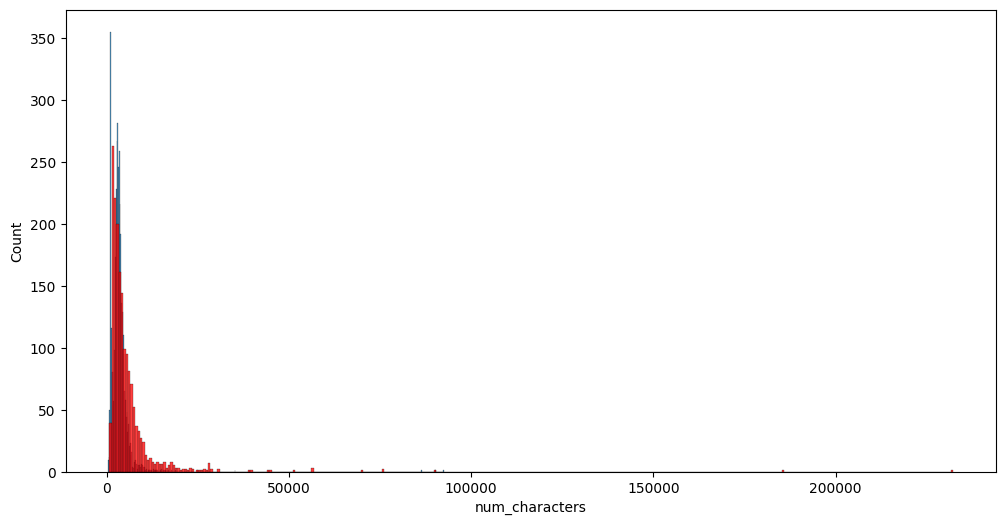

In [ ]:
import nltk
!pip install nltk
nltk.download('punkt')
nltk.download('punkt_tab')

# Assuming 'email' is your DataFrame and 'text' is the column you want to work with
email['text_length'] = email['text'].apply(len)

email['text']=email['text'].apply(lambda x:x.lower())

email['num_words']=email['text'].apply(len)  #calculates the total number of characters in the string.

email['num_characters']=email['text'].apply(len)

email['num_words']=email['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#actual number of words in the text, not characters.

email['num_sentences']=email['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(email[email['target']==0]['num_characters'])
sns.histplot(email[email['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

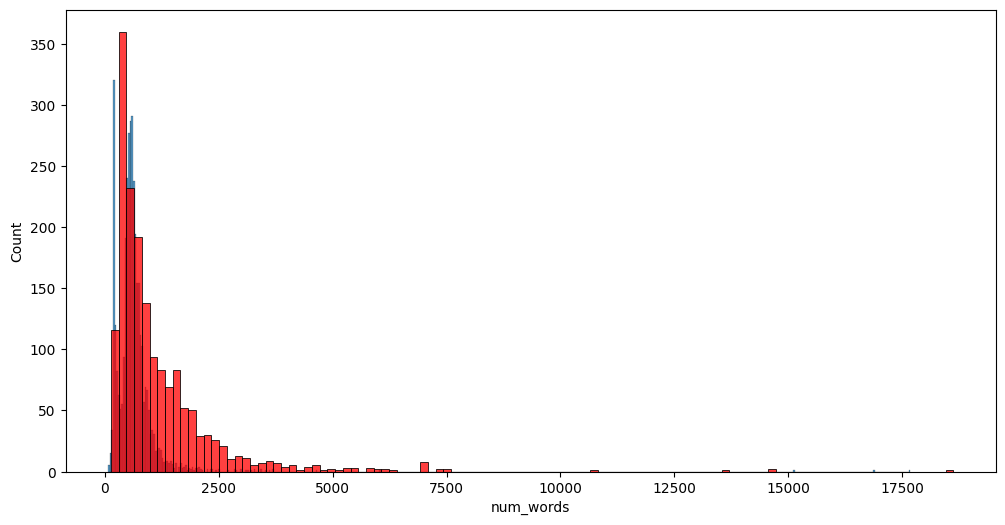

In [ ]:

#spam mess form big words

plt.figure(figsize=(12,6))
sns.histplot(email[email['target']==0]['num_words'])
sns.histplot(email[email['target']==1]['num_words'],color='red')


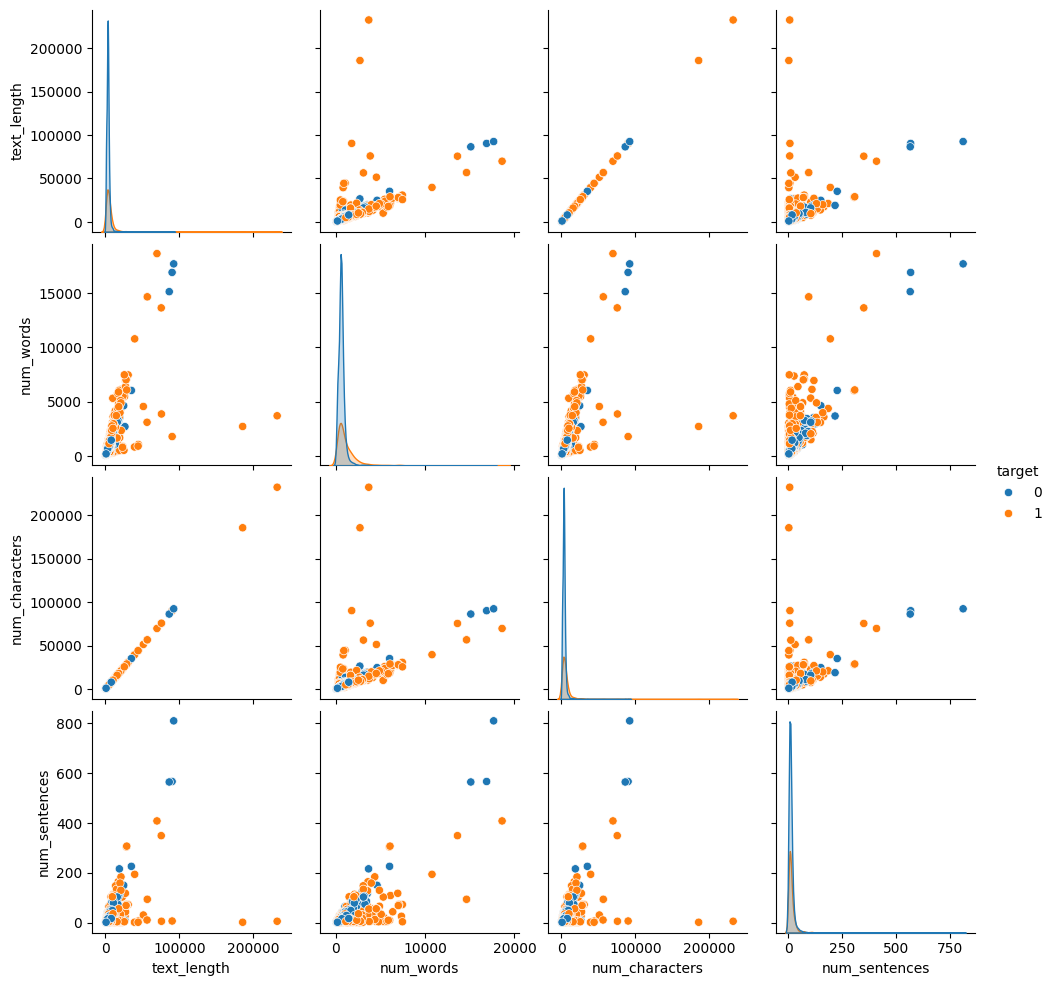

In [ ]:
sns.pairplot(email,hue='target')

In [ ]:
numeric_email = email.select_dtypes(include=np.number)
correlation_matrix = numeric_email.corr()
print(correlation_matrix)

                  target  text_length  num_words  num_characters  \
target          1.000000     0.171054   0.266034        0.171054   
text_length     0.171054     1.000000   0.681170        1.000000   
num_words       0.266034     0.681170   1.000000        0.681170   
num_characters  0.171054     1.000000   0.681170        1.000000   
num_sentences   0.060476     0.510576   0.713481        0.510576   

                num_sentences  
target               0.060476  
text_length          0.510576  
num_words            0.713481  
num_characters       0.510576  
num_sentences        1.000000  


<Axes: >

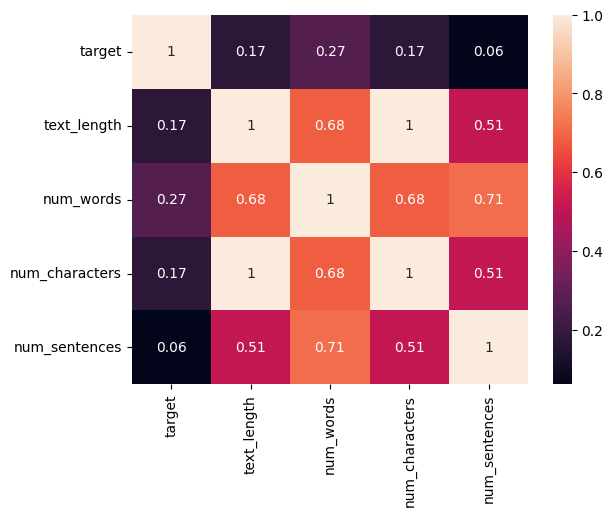

In [ ]:
sns.heatmap(correlation_matrix,annot=True)

DATA PROCESSING:
 lower case
 ,tokenization
,removing special char
,removing stop word and punc
,stemming





In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
      if i.isalnum():
          y.append(i)
  text= y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text= y [:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)



In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
email['text'][0]

"from ilug-admin@linux.ie mon jul 29 11:28:02 2002 return-path: <ilug-admin@linux.ie> delivered-to: yyyy@localhost.netnoteinc.com received: from localhost (localhost [127.0.0.1]) by phobos.labs.netnoteinc.com (postfix) with esmtp id a13d94414f for <jm@localhost>; mon, 29 jul 2002 06:25:11 -0400 (edt) received: from phobos [127.0.0.1] by localhost with imap (fetchmail-5.9.0) for jm@localhost (single-drop); mon, 29 jul 2002 11:25:11 +0100 (ist) received: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by dogma.slashnull.org (8.11.6/8.11.6) with esmtp id g6rhn7i17130 for <jm-ilug@jmason.org>; sat, 27 jul 2002 18:49:07 +0100 received: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org (8.9.3/8.9.3) with esmtp id saa25016; sat, 27 jul 2002 18:45:03 +0100 x-authentication-warning: lugh.tuatha.org: host root@localhost [127.0.0.1] claimed to be lugh received: from mail1.mail.iol.ie (mail1.mail.iol.ie [194.125.2.192]) by lugh.tuatha.org (8.9.3/8.9.3) with esmtp id saa24977 f

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from wordcloud import WordCloud

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('singing')

'sing'

In [ ]:
import string
email['transform_text'] = email['text'].apply(transform_text) # Pass the function object, not a string

<ipython-input-57-f550a92b06e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email['transform_text'] = email['text'].apply(transform_text) # Pass the function object, not a string


In [ ]:
email.head()

,text,target,text_length,num_words,num_characters,num_sentences,transform_text
0,from ilug-admin@linux.ie mon jul 29 11:28:02 2...,0,4098,816,4098,13,mon jul 29 2002 yyyi receiv localhost localhos...
1,from gort44@excite.com mon jun 24 17:54:21 200...,1,2189,520,2189,13,gort44 mon jun 24 2002 gort44 tue jun 4 2002 r...
2,from fork-admin@xent.com mon jul 29 11:39:57 2...,1,3598,640,3598,11,mon jul 29 2002 yyyi receiv localhost localhos...
3,from dcm123@btamail.net.cn mon jun 24 17:49:23...,1,1918,451,1918,1,dcm123 mon jun 24 2002 dcm123 mon jun 10 2002 ...
4,from ilug-admin@linux.ie mon aug 19 11:02:47 2...,0,3060,620,3060,7,mon aug 19 2002 yyyi receiv localhost localhos...


In [ ]:
#important word print
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
text_str = ' '.join(map(str, email['transform_text'].tolist())) #assuming you want to generate wordcloud from 'transform_text' column

wc.generate(text_str)



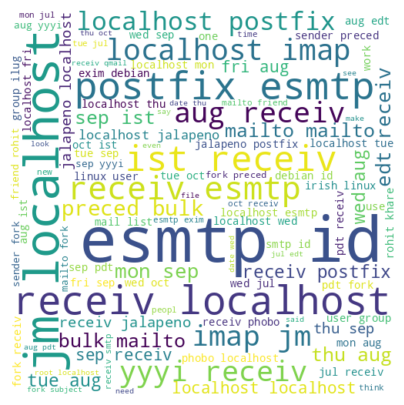

In [ ]:
ham_wc = wc.generate(email[email['target'] == 0]['transform_text'].str.cat(sep=" "))

# Display the word cloud
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()


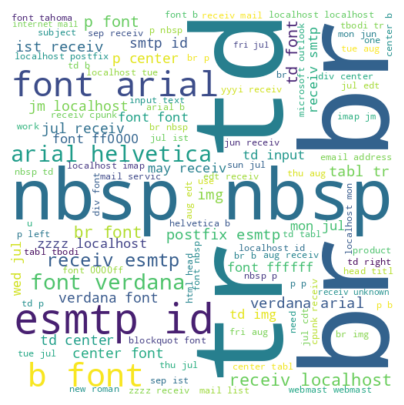

In [ ]:
spam_wc = wc.generate(email[email['target'] == 1]['transform_text'].str.cat(sep=" "))

# Display the word cloud
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()

In [ ]:
email.head()

,text,target,text_length,num_words,num_characters,num_sentences,transform_text
0,from ilug-admin@linux.ie mon jul 29 11:28:02 2...,0,4098,816,4098,13,mon jul 29 2002 yyyi receiv localhost localhos...
1,from gort44@excite.com mon jun 24 17:54:21 200...,1,2189,520,2189,13,gort44 mon jun 24 2002 gort44 tue jun 4 2002 r...
2,from fork-admin@xent.com mon jul 29 11:39:57 2...,1,3598,640,3598,11,mon jul 29 2002 yyyi receiv localhost localhos...
3,from dcm123@btamail.net.cn mon jun 24 17:49:23...,1,1918,451,1918,1,dcm123 mon jun 24 2002 dcm123 mon jun 10 2002 ...
4,from ilug-admin@linux.ie mon aug 19 11:02:47 2...,0,3060,620,3060,7,mon aug 19 2002 yyyi receiv localhost localhos...


In [ ]:
email[email['target'] == 1]['transform_text'].tolist()

['gort44 mon jun 24 2002 gort44 tue jun 4 2002 receiv esmtp id g544vfo20182 jm tue 4 jun 2002 receiv smtp id g544vc729935 tue 4 jun 2002 receiv unverifi emwac smtpr smtp id b0000918901 tue 04 jun 2002 b0000918901 chrbader ires gort44 subject cash home equiti date tue 04 jun 2002 7bit mortgag lender broker readi compet busi whether new home loan seek refin current home loan lower interest rate help mortgag rate low year take action refin home us includ peski credit card bill use extra cash pool alway want other say say ye even turn elsewher help easi term mortgag referr servic combin highest qualiti loan econom rate easiest qualif take 2 minut complet follow form oblig inform kept strictli confidenti must least 18 year age servic avail within unit state servic fast free free inform request form pleas visit http sinc receiv messag either respond one offer past address regist us wish pleas visit http',
 'mon jul 29 2002 yyyi receiv localhost localhost postfix esmtp id 0f3f544165 jm localh

In [ ]:
spam_corpus=[]
for msg in email[email['target'] == 1]['transform_text'].tolist():
    for words in msg.split():
              spam_corpus.append(words)

In [ ]:
len(spam_corpus)

579825

In [ ]:
ham_corpus=[]
for msg in email[email['target'] == 1]['transform_text'].tolist():
    for words in msg.split():
              ham_corpus.append(words)

In [ ]:
len(ham_corpus)

579825

In [ ]:
from collections import Counter # Import the Counter class

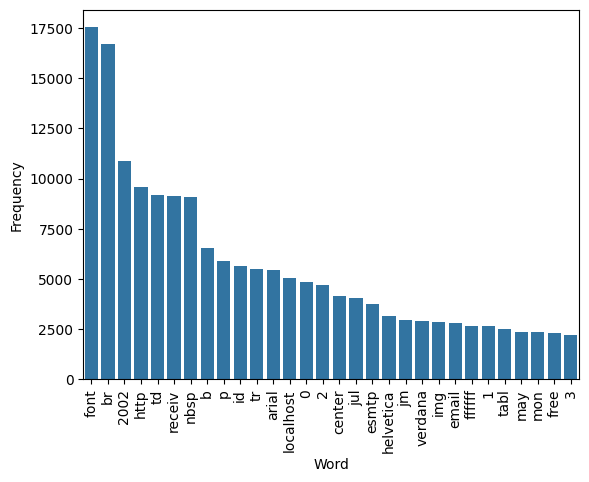

In [ ]:
spam_corpus_counter = Counter(spam_corpus)
spam_corpus_df = pd.DataFrame(spam_corpus_counter.most_common(30), columns=['Word', 'Frequency'])

# Plotting
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

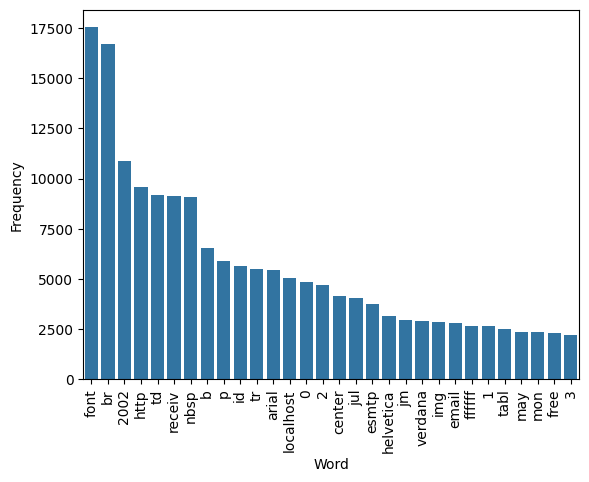

In [ ]:

ham_corpus_counter = Counter(ham_corpus)
ham_corpus_df = pd.DataFrame(ham_corpus_counter.most_common(30), columns=['Word', 'Frequency'])

# Plotting
sns.barplot(x='Word', y='Frequency', data=ham_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

MODEL BUILDING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [ ]:
X=cv.fit_transform(email['transform_text']).toarray()

In [ ]:
X.shape

(5329, 64035)

In [ ]:
y=email['target'].values

In [ ]:
y

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9737335834896811
[[707   9]
 [ 19 331]]
0.9735294117647059


In [ ]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9662288930581614
[[715   1]
 [ 35 315]]
0.9968354430379747


In [ ]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9512195121951219
[[711   5]
 [ 47 303]]
0.9837662337662337


In [ ]:
#using  TFidf
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [ ]:
X=tf.fit_transform(email['transform_text']).toarray()

In [ ]:
y=email['target'].values

In [ ]:
y

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9671669793621013
[[703  13]
 [ 22 328]]
0.9618768328445748


In [ ]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9071294559099438
[[716   0]
 [ 99 251]]
1.0


ANN

In [ ]:
X.shape
y=email['target'].values
y


array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
X_train_shape = X_train.shape
X_test_shape = X_test.shape

print("Shape of X_train:", X_train_shape)
print("Shape of X_test:", X_test_shape)

Shape of X_train: (4263, 64035)
Shape of X_test: (1066, 64035)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

NameError: name 'X' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
X_train_scaled

array([[-0.10143245, -0.05188611, -0.04870297, ..., -0.01531769,
        -0.02649862, -0.13577732],
       [-0.10143245, -0.05188611, -0.04870297, ..., -0.01531769,
        -0.02649862, -0.13577732],
       [-0.10143245, -0.05188611, -0.04870297, ..., -0.01531769,
        -0.02649862, -0.13577732],
       ...,
       [-0.10143245, -0.05188611, -0.04870297, ..., -0.01531769,
        -0.02649862, -0.13577732],
       [-0.10143245, -0.05188611, -0.04870297, ..., -0.01531769,
        -0.02649862, -0.13577732],
       [-0.10143245, -0.05188611, -0.04870297, ..., -0.01531769,
        -0.02649862, -0.13577732]])

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(34,activation='sigmoid',input_dim=64035)) # Change input_dim to 64035
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 34)                  │       2,177,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              35 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,177,259 (8.31 MB)

 Trainable params: 2,177,259 (8.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [ ]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - loss: 0.4835
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - loss: 0.1661
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.0733
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.0498
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0552
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0463
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0481
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0490
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0402
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0402


In [ ]:
model.layers[0].get_weights()

In [ ]:
model.predict(X_test_scaled)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


array([[4.1262498e-01],
       [4.7531282e-04],
       [9.6398854e-01],
       ...,
       [5.6860375e-01],
       [9.4996399e-01],
       [4.7268203e-04]], dtype=float32)

In [ ]:
y_log=model.predict(X_test_scaled)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.899624765478424

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=64035))#64035
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 11)                  │         704,396 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 704,540 (2.69 MB)

 Trainable params: 704,540 (2.69 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7440 - loss: 5.3475 - val_accuracy: 0.8980 - val_loss: 10.1355
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9154 - loss: 2.9827 - val_accuracy: 0.9144 - val_loss: 7.6830
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9883 - loss: 0.2322 - val_accuracy: 0.9179 - val_loss: 6.1231
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9966 - loss: 0.0167 - val_accuracy: 0.9191 - val_loss: 5.8426
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9951 - loss: 0.0149 - val_accuracy: 0.9203 - val_loss: 5.7175
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9954 - loss: 0.0118 - val_accuracy: 0.9215 - val_loss: 5.6117
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9958 - loss: 0.0106 - val_accuracy: 0.9226 - val_loss: 5.5131
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9965 - loss: 0.0073 - val_acc

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [ ]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0272 - val_loss: 5.5600
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.7739 - val_loss: 4.3929
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.4205 - val_loss: 0.5050
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.5738 - val_loss: 0.1559
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0778 - val_loss: 0.7322
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0239 - val_loss: 0.3050
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0060 - val_loss: 0.2621
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0037 - val_loss: 0.2130
Epoch 9/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0039 - val_loss: 0.1962
Epoch 10/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0046 - val_loss: 0.1818


In [ ]:
history.history

{'loss': [0.11438780277967453,
  1.6597076654434204,
  0.4272100031375885,
  0.4194580018520355,
  0.10598865896463394,
  0.03015967644751072,
  0.018877703696489334,
  0.004394050221890211,
  0.004365823697298765,
  0.0035966357681900263],
 'val_loss': [5.559991836547852,
  4.392920970916748,
  0.5050137042999268,
  0.15586106479167938,
  0.732249915599823,
  0.30504587292671204,
  0.2621036767959595,
  0.2129596322774887,
  0.19618001580238342,
  0.18182232975959778]}

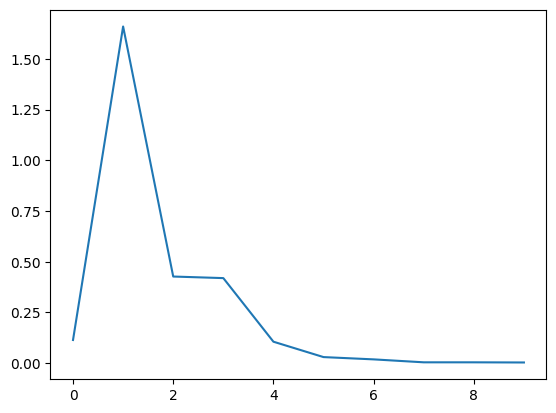

In [ ]:
plt.plot(history.history['loss'])